In [30]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [322]:
df = pd.read_csv('downloads/disciplinarity/master.csv')
#df.drop(index = [*range(114)],axis=0, inplace =True)
df.rename(columns = {'0' :'TEXT'},inplace=True)
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df.drop(index=[63, 76],inplace = True) #doc 64,77 (at index 63,76) failed to convert from pdf.
df =df.sort_values(['YEAR'])
df['TEXT'] = df['TEXT'].astype(str)

In [324]:
master_list = []
for i in range(1960,2020,10):
    mask = (df['YEAR'] >= i) & (df['YEAR'] < (i+10))
    master_list.append(df['TEXT'][mask].tolist())

In [260]:
#td = [gensim.utils.simple_preprocess(d) for d in master_list[0]]

In [325]:
from nltk import ngrams
master_grams = []
modelz = []
for list_year in master_list:
    inter_grams = []
    for doc in list_year:
        grams=[]
        grams=gensim.utils.simple_preprocess(doc)
        
        #bigram=list(ngrams(doc.split(),2))
        #for item in bigram:
        #   grams.append(item[0]+'_'+item[1])
        
        #trigram=list(ngrams(doc.split(),3))
        #for item in trigram:
        #   grams.append(item[0]+'_'+item[1]+'_'+item[2])
        inter_grams.append(grams)
    model = gensim.models.Word2Vec(inter_grams, size=300, window=7, min_count=1, sg=1)
    modelz.append(model)
    master_grams.append(inter_grams)
# fourgram=list(ngrams(Sentences.lower().split(),4))

In [328]:
b_master_grams =[]
for year in master_grams:
    for doc in year:
        b_master_grams.append(doc)

In [331]:
len(b_master_grams)

158

In [329]:
big_model = gensim.models.Word2Vec(b_master_grams, size=100, window=7, min_count=1, sg=1)

In [347]:
big_model.wv.most_similar('formalism', topn=15)

[('formalist', 0.931101381778717),
 ('functionalism', 0.9303992986679077),
 ('originality', 0.9114630818367004),
 ('reaction', 0.9112106561660767),
 ('radical', 0.9109077453613281),
 ('attitude', 0.9027870297431946),
 ('explicitly', 0.9021817445755005),
 ('historicist', 0.8998643159866333),
 ('consequence', 0.898565948009491),
 ('vanguard', 0.8969237208366394),
 ('authenticity', 0.8965511322021484),
 ('heroic', 0.8961970806121826),
 ('typological', 0.8960416316986084),
 ('marxist', 0.895888090133667),
 ('critically', 0.8950490355491638)]

In [338]:
big_model.wv.most_similar(positive=['eisenman', 'modernism'], negative=['corbusier'])

[('garde', 0.764068067073822),
 ('postmodernism', 0.7635235786437988),
 ('neo', 0.7553291320800781),
 ('avant', 0.7525164484977722),
 ('post', 0.7320262789726257),
 ('functionalism', 0.7307944297790527),
 ('position', 0.7304722666740417),
 ('critique', 0.7244860529899597),
 ('originality', 0.7234952449798584),
 ('postmodern', 0.7190908193588257)]

In [360]:
word = 'formal'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['planning', 'ideological', 'utopia', 'organization', 'rst', 'entire', 'phenomenon', 'through', 'scale', 'little']
--------------------1970--------------------
['geometry', 'spaces', 'deep', 'historical', 'dialectical', 'life', 'autonomy', 'technological', 'abstract', 'knowledge']
--------------------1980--------------------
['values', 'functions', 'material', 'geometry', 'relations', 'function', 'dialectical', 'objective', 'radically', 'force']
--------------------1990--------------------
['pair', 'repressed', 'objectivity', 'individual', 'shadow', 'against', 'technical', 'elements', 'formation', 'stone']
--------------------2000--------------------
['making', 'concerns', 'individual', 'geometric', 'narrative', 'human', 'specific', 'dynamic', 'experience', 'forces']
--------------------2010--------------------
['specific', 'understanding', 'memory', 'progress', 'works', 'ideal', 'shaped', 'relationship', 'material', 'relation']


In [351]:
# biggest corpus
word = 'autonomy'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['existing', 'force', 'visual', 'shape', 'proposed', 'translated', 'room', 'movements', 'leaving', 'contradiction']
--------------------1970--------------------
['autonomous', 'importance', 'cognitive', 'distinct', 'technical', 'sign', 'dialectical', 'mechanism', 'organization', 'knowledge']
--------------------1980--------------------
['autonomous', 'processes', 'possibilities', 'application', 'global', 'potential', 'dominant', 'government', 'renaissance', 'focus']
--------------------1990--------------------
['subjectivity', 'independent', 'death', 'representation', 'control', 'activity', 'excess', 'problematic', 'exchange', 'extended']
--------------------2000--------------------
['important', 'reality', 'indeed', 'logic', 'condition', 'definition', 'precisely', 'internal', 'unique', 'high']
--------------------2010--------------------
['situation', 'almost', 'claim', 'thinking', 'sculpture', 'clear', 'instance', 'zones', 'wolfflin', 'asa

In [352]:
# biggest corpus
word = 'technology'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['belief', 'obvious', 'message', 'grid', 'solution', 'categories', 'fashion', 'proportions', 'remains', 'genera']
--------------------1970--------------------
['geometry', 'typical', 'origins', 'high', 'renaissance', 'disciplinary', 'commentary', 'changing', 'techniques', 'painting']
--------------------1980--------------------
['criticism', 'ideology', 'everyday', 'post', 'media', 'industrial', 'reproduction', 'modernity', 'image', 'contradiction']
--------------------1990--------------------
['education', 'published', 'essays', 'ware', 'american', 'massachusetts', 'school', 'arts', 'columbia', 'planning']
--------------------2000--------------------
['condition', 'autonomous', 'disciplinarity', 'machine', 'virtual', 'reality', 'result', 'gehry', 'definition', 'essential']
--------------------2010--------------------
['subject', 'future', 'nature', 'knowledge', 'its', 'diagram', 'such', 'does', 'forms', 'artist']


In [358]:
# biggest corpus
word = 'linguistic'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['configuration', 'follow', 'consideration', 'signicance', 'entirely', 'remained', 'back', 'law', 'opposed', 'pattern']
--------------------1970--------------------
['distinguish', 'possibilities', 'universal', 'constituted', 'functioning', 'practical', 'praxis', 'gure', 'totality', 'concerns']
--------------------1980--------------------
['location', 'rigorous', 'typological', 'local', 'approaches', 'morphological', 'combination', 'background', 'precise', 'corresponding']
--------------------1990--------------------
['academy', 'discursive', 'implications', 'locus', 'humanities', 'strategy', 'develop', 'institutions', 'myth', 'regime']
--------------------2000--------------------
['special', 'debates', 'involved', 'postmodern', 'using', 'regarding', 'ofarchitectural', 'aspects', 'utility', 'defining']
--------------------2010--------------------
['web', 'chapter', 'hold', 'plans', 'ecological', 'james', 'shift', 'conception', 'increasingly'

In [369]:
word = 'drawn'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['carried', 'discovered', 'further', 'orders', 'lie', 'origin', 'maximum', 'exception', 'paths', 'conventions']
--------------------1970--------------------
['stated', 'tend', 'isolated', 'theoretically', 'conclude', 'saying', 'lost', 'identify', 'willing', 'ought']
--------------------1980--------------------
['literally', 'begin', 'located', 'determined', 'ourselves', 'negative', 'considered', 'cut', 'lead', 'changes']
--------------------1990--------------------
['younger', 'bringing', 'influence', 'success', 'letters', 'report', 'continues', 'occupy', 'monumental', 'traits']
--------------------2000--------------------
['constantly', 'greater', 'shape', 'symbolic', 'rooted', 'intended', 'reasoning', 'metaphors', 'derive', 'utility']
--------------------2010--------------------
['pure', 'core', 'remain', 'movement', 'film', 'presence', 're', 'used', 'importance', 'self']


In [370]:
word = 'drawing'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['standard', 'ground', 'secondary', 'jakobson', 'despite', 'package', 'main', 'complexity', 'uses', 'eclecticism']
--------------------1970--------------------
['closure', 'realized', 'simultaneously', 'lives', 'eective', 'substantial', 'metaphorical', 'lived', 'justication', 'procedures']
--------------------1980--------------------
['composition', 'essentially', 'abstraction', 'timelessness', 'turning', 'implicit', 'wall', 'sort', 'dynamic', 'singularity']
--------------------1990--------------------
['postwar', 'engagement', 'search', 'former', 'led', 'connection', 'events', 'diverse', 'impact', 'involved']
--------------------2000--------------------
['projective', 'transition', 'series', 'rise', 'european', 'domestic', 'principles', 'decoration', 'capital', 'nihilism']
--------------------2010--------------------
['range', 'establish', 'whose', 'english', 'held', 'flows', 'uses', 'offer', 'effects', 'sources']


In [371]:
word = 'visual'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['utopianism', 'instead', 'mathematical', 'prices', 'proposed', 'behavior', 'existing', 'perrault', 'philosophical', 'began']
--------------------1970--------------------
['techniques', 'productive', 'study', 'realization', 'technological', 'explosion', 'pleasure', 'discourses', 'emphasis', 'commentary']
--------------------1980--------------------
['tectonic', 'mechanism', 'motivation', 'activity', 'presents', 'organizes', 'propose', 'characteristic', 'brings', 'concern']
--------------------1990--------------------
['culture', 'historians', 'literary', 'discipline', 'practice', 'cultural', 'number', 'archi', 'design', 'fine']
--------------------2000--------------------
['concepts', 'living', 'geometric', 'aspects', 'modes', 'manner', 'mental', 'consider', 'bodies', 'latter']
--------------------2010--------------------
['along', 'scale', 'practices', 'position', 'away', 'details', 'taken', 'significance', 'conceptual', 'weapons']


In [382]:
word = 'object'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['use', 'experience', 'parole', 'environment', 'world', 'values', 'level', 'terms', 'individual', 'first']
--------------------1970--------------------
['understood', 'function', 'representation', 'closed', 'element', 'science', 'objective', 'instrument', 'whole', 'system']
--------------------1980--------------------
['ornament', 'structural', 'presence', 'individual', 'reading', 'addition', 'condition', 'grounded', 'spirit', 'continuity']
--------------------1990--------------------
['outside', 'inside', 'precisely', 'becomes', 'theoretical', 'absence', 'itself', 'important', 'becoming', 'machine']
--------------------2000--------------------
['external', 'allows', 'possibility', 'act', 'abstract', 'productive', 'subjective', 'outside', 'truth', 'sign']
--------------------2010--------------------
['sense', 'material', 'place', 'interiority', 'thus', 'traditional', 'means', 'memory', 'moment', 'life']


In [386]:
word = 'theory'
year = 1960
for mod in modelz:
    print('--------------------'+str(year)+'--------------------')
    print([x[0] for x in mod.wv.most_similar(word ,topn=10)])
    year += 10

--------------------1960--------------------
['occupants', 'signified', 'age', 'development', 'element', 'great', 'area', 'visible', 'laws', 'knowledge']
--------------------1970--------------------
['practice', 'ideology', 'distinction', 'ideological', 'non', 'relationship', 'eisenmans', 'western', 'theoretical', 'based']
--------------------1980--------------------
['history', 'contemporary', 'philosophy', 'urban', 'everyday', 'life', 'artistic', 'science', 'postmodern', 'crisis']
--------------------1990--------------------
['studies', 'historical', 'culture', 'architectural', 'cultural', 'criticism', 'architecture', 'archi', 'science', 'architec']
--------------------2000--------------------
['history', 'practice', 'critical', 'architectural', 'design', 'discourse', 'contemporary', 'philosophy', 'language', 'criticism']
--------------------2010--------------------
['architecture', 'work', 'art', 'historians', 'discipline', 'architectural', 'cultural', 'century', 'past', 'terms']



**ROBERT VENTURI, 1925-2018:**
A controversial critic of the blithely functionalist and symbolically vacuous architecture of corporate modernism during the 1950s, Venturi was one of the first architects to question some of the premises of the Modern Movement. He published his "gentle manifesto", Complexity and Contradiction in Architecture in 1966; in its introduction, Vincent Scully called it "probably the most important writing on the making of architecture since Le Corbusier's Vers Une Architecture of 1923." The work was derived from course lectures at the University of Pennsylvania, and Venturi received a grant from the Graham Foundation in 1965 to aid in its completion. The book demonstrated, through countless examples, an approach to understanding architectural composition and complexity, and the resulting richness and interest.

**COLIN ROWE, 1920-1999:** Rowe's original approach was based on making comparisons between cultural events that conventional history kept widely separated and categorised, but which he unearthed from his vast personal erudition (in constant development) and placed together for comparison. His unorthodox and non-chronological view of history then made it possible for him to develop theoretical speculations such as his famous essay "The Mathematics of the Ideal Villa" (1947) in which he theorised that there were compositional "rules" in Palladio's villas that could be demonstrated to correspond to similar "rules" in Le Corbusier's villas at Poissy and Garches. 

**ROBERT A.M. STERN, 1925- :** In the 1970s, and early 1980s, Stern developed a reputation as a postmodern architect for integrating classical elements into his designs for contemporary buildings,[17] but in the mid-1980s, his work became more traditional, more in keeping with the then emerging New Classical architectural movement.[18] Stern, however, has rejected such characterizations, arguing that his projects draw on vernacular context and local traditions.[19] In recent years, the work of Stern's office has ranged from traditional to modernist, depending on the building type and project location, and is best characterized as eclectic and contextual.

**KENNETH FRAMPTON, 1930- :** Frampton's essay was included in the book The Anti-Aesthetic. Essays on Postmodern Culture, edited by Hal Foster, though Frampton is critical of postmodernism. Frampton's own position attempts to defend a version of modernism that looks to either critical regionalism or a 'momentary' understanding of the autonomy of architectural practice in terms of its own concerns with form and tectonics which cannot be reduced to economics (whilst conversely retaining a Leftist viewpoint regarding the social responsibility of architecture). He summed up his critical stance towards postmodernist architecture and its advocates' belief in the primacy of architecture as a language.

**CHARLES JENCKS, 1935-2018:** Jencks discussed his theories of postmodern architecture in The Language of Post-Modern Architecture (1977), which ran to seven editions. He examined the paradigm shift from modern to postmodern architecture, claiming that modern architecture concentrates on univalent forms such as right angles and square buildings often resembling office buildings. However, postmodern architecture focuses on forms derived from the mind, body, city context, and nature. In 2007, he published ‘Critical Modernism,’ the fifth edition of his What is Post-Modernism?

**LE CORBUSIER 1887-1965:** was a Swiss-French architect, designer, painter, urban planner, writer, and one of the pioneers of what is now regarded as modern architecture. He was born in Switzerland and became a French citizen in 1930. His career spanned five decades, and he designed buildings in Europe, Japan, India, and North and South America.

**MIES VAN DE ROHE:** born Maria Ludwig Michael Mies; March 27, 1886 – August 17, 1969) was a German-American architect.[1] He was commonly referred to as Mies, his surname. Along with Alvar Aalto, Le Corbusier, Walter Gropius and Frank Lloyd Wright, he is regarded as one of the pioneers of modernist architecture.

Mies was the last director of the Bauhaus, a seminal school in modern architecture.[2] After Nazism's rise to power, with its strong opposition to modernism (leading to the closing of the Bauhaus itself), Mies emigrated to the United States. He accepted the position to head the architecture school at the Armour Institute of Technology (later the Illinois Institute of Technology), in Chicago.

**WALTER GROPIUS, 1883-1969:** was a German architect and founder of the Bauhaus School,[1] who, along with Alvar Aalto, Ludwig Mies van der Rohe, Le Corbusier and Frank Lloyd Wright, is widely regarded as one of the pioneering masters of modernist architecture. He is a founder of Bauhaus in Weimar (1919).[2] Gropius was also a leading architect of the International Style.[3]

**LESPRIT NOUVEAU:**  was a magazine founded by architect Le Corbusier, poet Paul Dermée, and painter Amédée Ozenfant in 1920.[1] The publication addressed a wide range of artistic disciplines including literature, visual arts, and architecture.[2] The articles written by Le Corbusier for L'Esprit Nouveau comprise a number of those appearing in his seminal 1923 book Toward an Architecture.[3] L'Esprit Nouveau remained in publication until 1925, releasing a total of 28 copies.

In [389]:
def dis_close_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [21]:
class Clustering():
    def __init__(self,  w2v, model):
        self.model = model
        self.w2v = w2v
        self.w2vecarrays = np.array([i[0] for i in w2v])
        pass
    
    def fit_transform(self, number_of_clusters):
        cluster = KMeans(n_clusters=number_of_clusters, random_state=0).fit(self.w2vecarrays)
        #cluster = DBSCAN(eps=0.01, min_samples=3).fit(self.w2vecarrays)
        #cluster = SpectralClustering(n_clusters=number_of_clusters, eigen_solver='arpack',affinity="nearest_neighbors")
        #cluster = AgglomerativeClustering(n_clusters=number_of_clusters, linkage='ward')
        self.labels = cluster.labels_
        counts = np.bincount(self.labels[self.labels>=0])
               
        self.concepts = {}
        
        for row_id in range(0, len(self.labels)):
            word = self.w2v[row_id][1]
            label = self.labels[row_id]
            if label in self.concepts:
                self.concepts[label].append(word)
            else:
                self.concepts[label] = [word]
                
        return self.concepts
    
    def visualize(self):
        tsne = TSNE(n_components=2)
        X_tsne = tsne.fit_transform(self.w2vecarrays)
        
        for concept in sorted(self.concepts):
            try:
                txt = " ".join(self.concepts[concept])
                wordcloud = WordCloud(background_color="white",max_font_size=40, relative_scaling=.5).generate(txt)
                plt.figure()
                plt.imshow(wordcloud)       
                plt.title(concept)
                plt.axis("off")
                plt.show()
            except ValueError:
                print(self.concepts[concept])

/Users/jhg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/Users/jhg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/jhg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


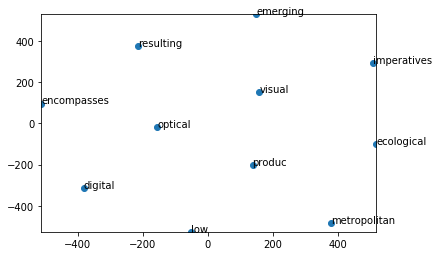

In [390]:
dis_close_tsnescatterplot(big_model, 'visual')

In [ ]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)